# Ford GoBike Trip Duration by DateTime and User Type

## by Taima Hamadneh

## Investigation Overview


> In this analysis, I examined how trip durations vary based on DateTime and customer type.

## Dataset Overview and Executive Summary

> The Ford GoBike System is a popular bike-sharing service operating in the San Francisco Bay area. This analysis dives into the usage patterns, focusing on aspects such as ride duration, user demographics, and the impact of the bike-share participation program. By examining these factors, we can gain valuable insights into user behavior and preferences, which can inform strategic decisions for improving the service.

In [22]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [23]:
# load in the dataset into a pandas dataframe
bike =pd.read_csv('201902-fordgobike-tripdata.csv')


In [24]:
# Data cleaning
bike.dropna(inplace=True)

In [25]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])

In [26]:
bike['member_birth_year'] = bike['member_birth_year'].astype('Int64')  # Use 'Int64' to handle NaNs
bike['bike_id'] =bike['bike_id'].astype('int')

In [27]:
import datetime as dt
bike['start_day'] = bike['start_time'].dt.day_name()
bike['start_month'] = bike['start_time'].dt.month_name()
bike['start_hr'] = bike['start_time'].dt.hour
bike['start_hr'] = bike.start_hr.astype(str)

bike['end_day'] = bike['end_time'].dt.day_name()
bike['end_month'] = bike['end_time'].dt.month_name()
bike['end_hr'] = bike['end_time'].dt.hour
bike['end_hr'] = bike.end_hr.astype(str)

In [28]:
ordinal_categories = {
    'start_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'end_day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    'start_hr': [str(i).zfill(2) for i in range(24)],  
    'end_hr': [str(i).zfill(2) for i in range(24)]  
}

# Convert columns to categorical types
for column, categories in ordinal_categories.items():
    bike[column] = bike[column].astype(pd.CategoricalDtype(categories=categories, ordered=True))

## Distribution of Rides by User Type

- Subscribers account for over 90% of the total rides




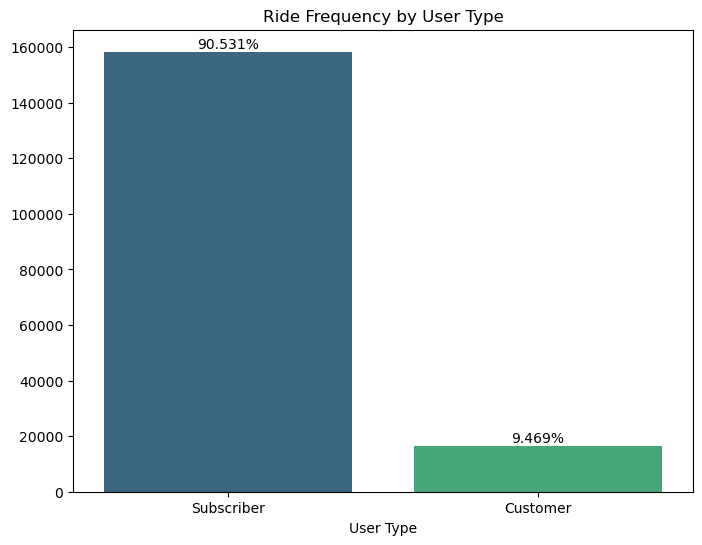

In [29]:
plt.figure(figsize=(8, 6))

# Calculate the count of each user type
user_type_counts = bike['user_type'].value_counts()

# Create a bar plot
ax = sns.barplot(x=user_type_counts.index, y=user_type_counts.values, palette='viridis')

# Add annotations to the bars
total_count = bike.shape[0]

for p in ax.patches:
    height = p.get_height()
    percentage = f'{height / total_count:.3%}'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2, height), 
                ha='center', va='bottom', fontsize=10, color='black')

ax.set_xlabel('User Type')
ax.set_title('Ride Frequency by User Type')

# Display the plot
plt.show()


Subscribers account for over 90% of the total rides, indicating that the majority of users prefer a subscription-based model over pay-as-you-go options.

## Trip Duration by Days

> Trips on weekends have a longer duration compared to those taken during the weekdays.

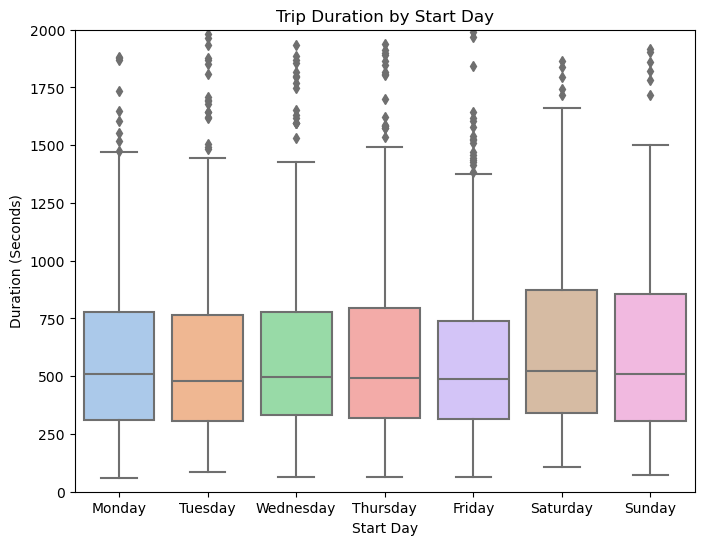

In [30]:
sample_indices = np.random.choice(bike.index, 4000, replace=False)
sampled_data = bike.loc[sample_indices]

plt.figure(figsize=(8, 6))
sns.boxplot(data=sampled_data, x='start_day', y='duration_sec', palette='pastel')
plt.ylim([0, 2000])
plt.xlabel('Start Day')
plt.ylabel('Duration (Seconds)')
plt.title('Trip Duration by Start Day')
plt.show()

Trips tend to have longer durations on weekends compared to weekdays, possibly due to leisure activities or less time pressure."

## Trip Duration across Customer Types

> Trips made by customers have a longer duration compared to those made by subscribers.

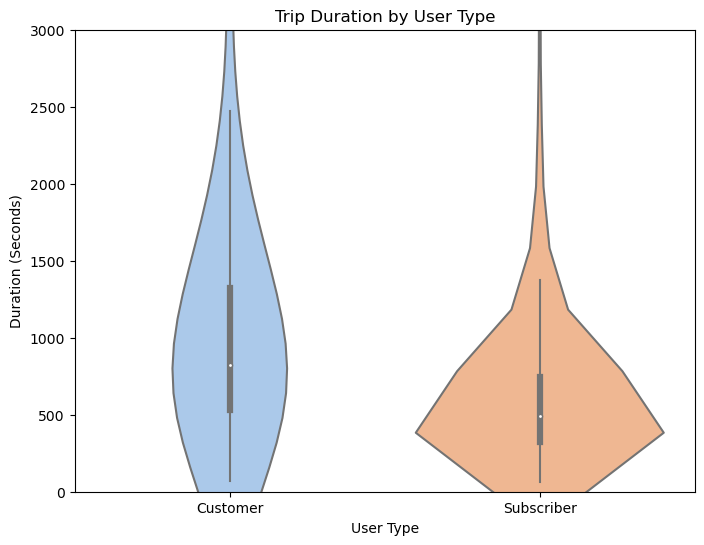

In [31]:
# Trip Duration across Customer Types
samples = np.random.choice(bike.shape[0], 2000, replace=False)
diamonds_samp = bike.iloc[samples]

plt.figure(figsize=(8, 6))
sns.violinplot(data=diamonds_samp, x='user_type', y='duration_sec', palette='pastel')
plt.ylim([0, 3000])
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')
plt.title('Trip Duration by User Type')
plt.show()


Customers generally have longer trip durations compared to subscribers, which could suggest that customers use the service for more extended, possibly recreational, trips.

### Trip Duration by Gender and Bike Share Participation


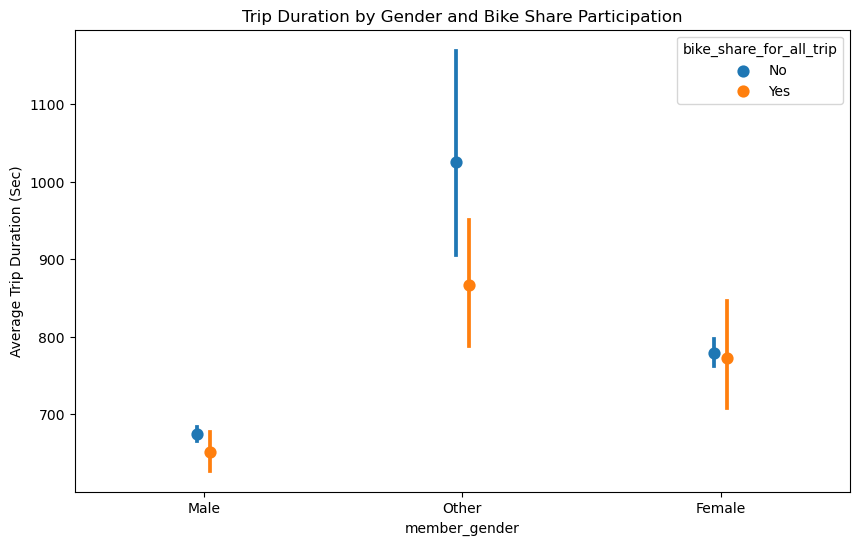

In [32]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=bike, x='member_gender', y='duration_sec', hue='bike_share_for_all_trip', linestyles='', dodge=True)
plt.title('Trip Duration by Gender and Bike Share Participation')
plt.ylabel('Average Trip Duration (Sec)')
plt.gca().yaxis.set_tick_params(which='minor', length=0)
plt.show()

Females tend to have slightly longer trips on average than males, and those participating in bike share programs have shorter trips.

### Trip Duration by Gender and User Type


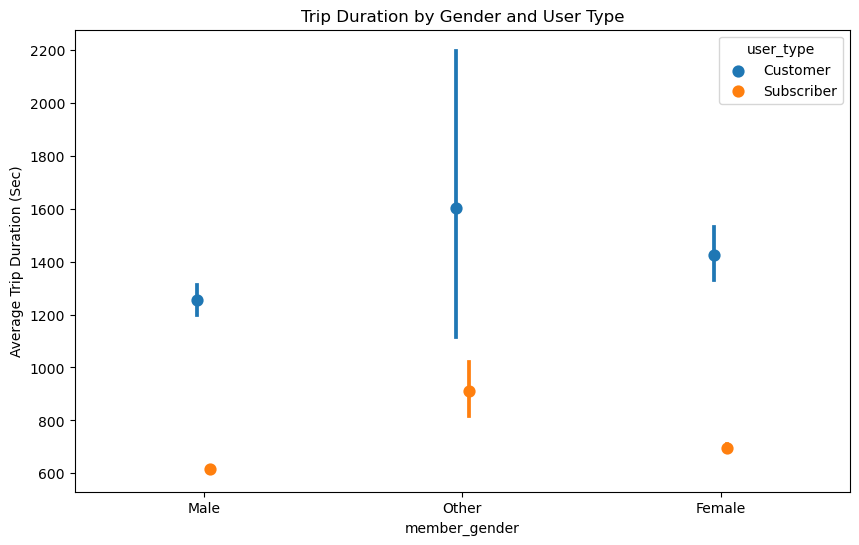

In [33]:
plt.figure(figsize=(10, 6))
sns.pointplot(data=bike, x='member_gender', y='duration_sec', hue='user_type', linestyles='', dodge=True)
plt.title('Trip Duration by Gender and User Type')
plt.ylabel('Average Trip Duration (Sec)')
plt.gca().yaxis.set_tick_params(which='minor', length=0)
plt.show()

### Trip Duration by Bike Share Participation and User Type


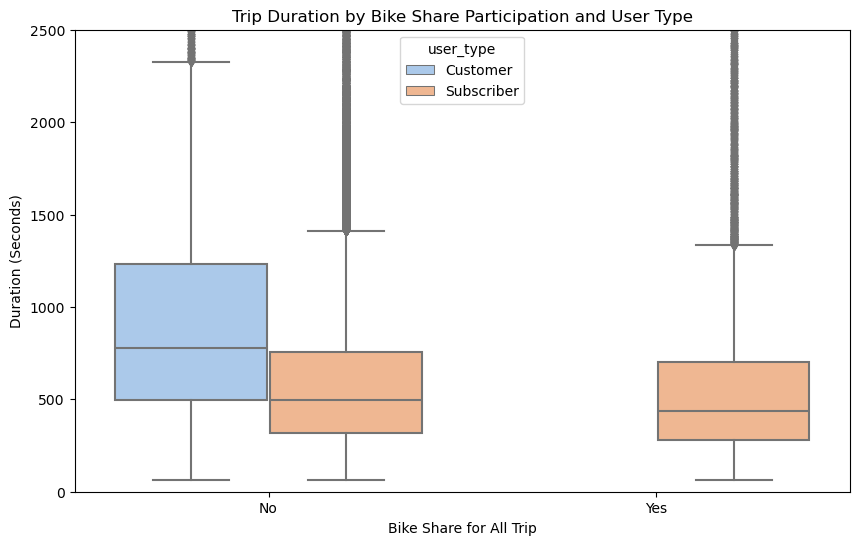

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=bike, x='bike_share_for_all_trip', y='duration_sec', hue='user_type', palette='pastel')
plt.ylim([0, 2500])
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (Seconds)')
plt.title('Trip Duration by Bike Share Participation and User Type')
plt.show()

Subscribers participating in the bike share program have shorter trips, likely due to regular commuting patterns, while customers show a broader range of trip durations.

____________________________________________________________________________________
### 1. Who Are the Ford GoBike Users?

When we dive into the dataset, it’s clear that the vast majority of Ford GoBike users are subscribers—they account for over 90% of all rides. This tells us that most people using the service prefer a subscription model, which likely means they’re riding regularly, perhaps for daily commutes.

____________________________________________________________________________________
### 2. When Do People Ride?

When we look at the timing of rides, there's a noticeable difference in trip durations depending on the day of the week. Trips tend to be longer on weekends compared to weekdays. This likely reflects how people use the service: weekends are probably more about leisure and relaxation, so riders take their time and enjoy longer, more casual trips. On the other hand, shorter trips during the weekdays suggest that people are mainly using the bikes for commuting or running quick errands, where time is more of a factor.

____________________________________________________________________________________

###  3. Gender and Bike Share Participation

Further analysis shows that gender and participation in the bike-share program both effect trip duration. On average, females have slightly longer trips than males. Additionally, those who participate in the bike-share-for-all program (which offers discounted access) tend to have shorter trips. This might indicate that bike-share program participants are using the bikes for specific, practical purposes like commuting, rather than for recreational use.

____________________________________________________________________________________

###  4. Interaction Between User Type and Bike Share Participation

Examining the interaction between user type and bike share participation provides more nuanced insights. Subscribers who participate in the bike-share-for-all program have shorter trips compared to customers, reflecting a pattern consistent with regular commuting or routine use. In contrast, customers, especially those not participating in the program, show a broader range of trip durations. This variability suggests a mix of use cases, from short trips to much longer, potentially tourist or leisure rides.

### Conclusion

The Ford GoBike dataset offers a clear view of user behavior within the bike-sharing system. With subscribers making up the majority, it’s evident that the service is heavily relied upon by regular commuters.  The longer trips observed on weekends and among customers highlight the service’s dual purpose—serving both daily commuters and casual riders. 

Understanding these usage patterns is essential for improving bike availability, optimizing station locations, and refining marketing strategies. By addressing the distinct needs of these different user groups, Ford GoBike can enhance user satisfaction and boost overall service usage, solidifying its position as a key player in sustainable transportation in the San Francisco Bay area.

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.


In [35]:
!python -m nbconvert --to html Ford_GoBike_Part_2.ipynb

[NbConvertApp] Converting notebook Ford_GoBike_Part_2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 568206 bytes to Ford_GoBike_Part_2.html
